## Truss Structure Modelling Using Finite Element Method ##
Function Declaration - Element Stiffness Matrix

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def element_stiffness(n1, n2, A, E):
    '''Returns Rod Elemental Matrix'''
    d = n2 - n1
    L = np.linalg.norm(d)
    c = d[0] / L
    s = d[1] / L
    k_local = (A * E / L) * np.array([[ 1, -1],[-1,  1]], dtype=float)
    T = np.array([[ c, s, 0, 0],[ 0, 0, c, s]], dtype=float)
    k_structural = np.matmul(T.T, np.matmul(k_local, T))

    return k_structural

Global Degrees of Freedom (DOF)

In [ ]:
def dof_el(nnod1, nnod2):
    '''Returns Elemental dof for Assembly'''
    return [2*(nnod1+1)-2,2*(nnod1+1)-1,2*(nnod2+1)-2,2*(nnod2+1)-1]



Plot

In [ ]:
def plot_truss(X,C):

        plt.figure(figsize=(6,3))
        for iEl in range(C.shape[0]):
            plt.plot([X[C[iEl,0],0], X[C[iEl,1],0]],[X[C[iEl,0],1], X[C[iEl,1],1]],'-', linewidth=1)

        plt.xlabel('x')
        plt.ylabel('y')
        plt.grid(True)
        plt.show()

Structure Nodes, Elements, Secions and Materials

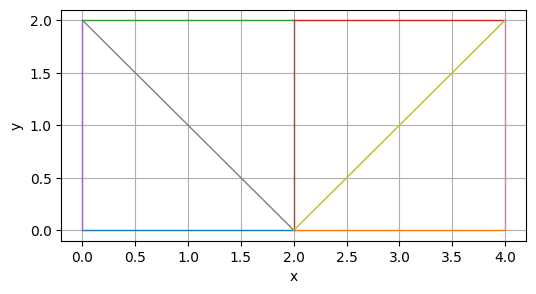

In [ ]:

# Node Coordinate Matrix (x, y)
X = np.zeros([6,2],float)
X[0:3,0] = np.linspace(0.0, 4.0, 3)
X[3:6,0] = np.linspace(0.0, 4.0, 3)
X[3:6,1] = np.linspace(2.0, 2.0, 3)

# Element Connection Matrix (n1, n2)
C = np.zeros([9,2],int)
C[0,0:] = [0,1]
C[1,0:] = [1,2]
C[2,0:] = [3,4]
C[3,0:] = [4,5]
C[4,0:] = [0,3]
C[5,0:] = [1,4]
C[6,0:] = [2,5]
C[7,0:] = [1,3]
C[8,0:] = [1,5]

plot_truss(X,C)

# Unique Section
A = 0.001

# Unique Material
E = 200E9

Boundary Conditions and Loads

In [ ]:
# Boundary conditions matrix: use False for free DOF; True for prescribed displacement
bc = np.full((6, 2), False)
bc[0,0] = True
bc[3,0:] = True
bc_structural_mask=bc.reshape(1,12).ravel()

# Loads matrix: Fx, Fy per node
loads = np.zeros([6,2],float)
loads[1:3,1] = -2e3
load_structural_reduced=loads.reshape(1,12).ravel()[~bc_structural_mask]
print(loads)

[[    0.     0.]
 [    0. -2000.]
 [    0. -2000.]
 [    0.     0.]
 [    0.     0.]
 [    0.     0.]]


Solution

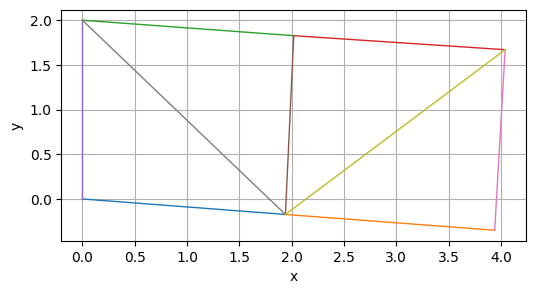

In [ ]:
# Matrix assembly
k_global = np.zeros([12,12],float)
for iEl in range(C.shape[0]):
    dof=dof_el(C[iEl,0], C[iEl,1])
    k_elemental=element_stiffness(X[C[iEl,0],:], X[C[iEl,1],:], A, E)
    k_global[np.ix_(dof,dof)]+=k_elemental

# Matrix reduction
k_reduced=k_global[~bc_structural_mask][:,~bc_structural_mask]

# Displacement solve
d=np.zeros([12,],float)
d[~bc_structural_mask]+=np.linalg.solve(k_reduced,load_structural_reduced)

# Deformed shape
D=d.reshape(6,2)

plot_truss(X+D*1000,C)